### **01 爬取高德POI数据**

In [1]:
# import xlwt 
# import urllib.request 
# from bs4 import BeautifulSoup 
# import re 

# poiTag = ["id","name","type","typecode","biz_type","address","location","tel","pname","cityname","adname"] #返回结果控制为base时，输出的POI标签类别
# poiSoupTag = ["idSoup","nameSoup","typeSoup","typecodeSoup","biz_typeSoup","addressSoup","locationSoup","telSoup","pnameSoup","citynameSoup","adnameSoup"] #包装对应的Soup
# pattern = re.compile("(?:>)(.*?)(?=<)",re.S) 
# poiExcel =xlwt.Workbook()
# sheet = poiExcel.add_sheet("poiResult")

# for colIndex in range(len(poiTag)):
#     sheet.write(0,colIndex,poiTag[colIndex]) 
# offset = 10 
# maxPage = 10 
# types = "150700" 
# city = "130101"

# for pageIndex in range(1, maxPage + 1):
#     try:
#         url = "http://restapi.amap.com/v3/place/text?&keywords=&types=" + types + "&city=" + city + "&citylimit=true&output=xml&offset=" + str(offset) + "&page="+ str(pageIndex) + "&key=6654f8694c05e07388f8e1e416f4a04c&extensions=base"
        
#         poiSoup = BeautifulSoup(urllib.request.urlopen(url).read(),"xml") 
#         for tagIndex in range(len(poiTag)):
#             poiSoupTag[tagIndex] = poiSoup.findAll(poiTag[tagIndex]) 
#         for rowIndex in range(len(poiSoupTag[0])):
#             for colIndex in range(len(poiSoupTag)):
#                 sheet.write(len(poiSoupTag[0]) * (pageIndex - 1) + rowIndex + 1, colIndex, re.findall(pattern,str(poiSoupTag[colIndex][rowIndex])))
                
#     except Exception as e:
#         print(e) 

# poiExcel.save("D:/notebook/POI&" + types + "&" + city + ".xls")
# print("Done!")

**爬取数据如下图所示**

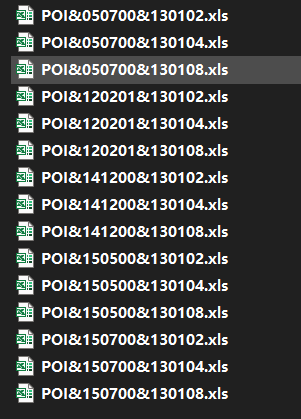

### **03 数据可视化**

In [12]:
import folium
import pandas as pd
import webbrowser as wb
import numpy as np
from folium.plugins import HeatMap
archive = data


latitude = archive['latitude']
longitude = archive['longitude']
type0 = archive['type']

m = folium.Map(location=[np.mean(latitude), np.mean(longitude)],  
               width='100%',
               height='100%',
               zoom_start=12,   
               min_zoom=0,    
               max_zoom=18,
               tiles="Stamen Terrain",  
               attr="高德地图"
               )

#在地图上标识出数据点
def pointpoint0(m, latitude, longitude,type0):
    point = folium.map.FeatureGroup()
    colors = ['black','red','blue','yellow','green','blue','white']
    radius = [1,1,1,1,1,1,3]
    for lat, lon,index in zip(latitude,longitude,type0):
        point.add_child(
            folium.CircleMarker(
                (lat, lon),
                radius=radius[index],   # 圆圈半径
                color=colors[index], # 半径颜色
                fill=True,     # 内部填充
                fill_color=colors[index],
                fill_opacity=1,
            )
        )
    m.add_child(point)

#生成400个格子
for i in range(20):
    for j in range(20):
        folium.Polygon(
            [
                [37.99 + 0.005 * j, 114.43 + i * 0.01],           
                [37.99 + 0.005 * j, 114.43 + (i + 1) * 0.01],
                [37.99 + 0.005 * (j + 1), 114.43 + (i + 1) * 0.01],
                [37.99 + 0.005 * (j + 1), 114.43 + i * 0.01]
            ], color='orange', weight=1,fill=True, fill_color='blue', fill_opacity=0.2
        ).add_to(m)                     
m.add_child(folium.LatLngPopup())

pointpoint0(m, latitude, longitude,type0)

m